# Prediction of CO2 Emissions in Vehicles using Neural Networks

In this notebook, we are going to experiment with machine learning techniques using a dataset that contains information from 1067 vehicles. This information is used to obtain models that allow predicting carbon dioxide (CO2) emissions given certain vehicle characteristics.

Each vehicle is described using five attributes:
1. **ENGINESIZE**: Engine size in liters.
2. **CYLINDERS**: Number of cylinders the engine has.
3. **FUELCONSUMPTION_CITY**: Vehicle's fuel consumption in urban areas (L/100 km).
4. **FUELCONSUMPTION_HWY**: Vehicle's fuel consumption in extra-urban areas (L/100 km).
5. **CO2EMISSIONS**: CO2 emissions of the vehicle, where 0 means that emissions are low and 1 means they are high.

The goal is to build neural network models that allow predicting the dependent variable **CO2EMISSIONS**.

### Install and import libraries

In [109]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib 
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [110]:
import numpy as np 
import pandas as pd
import sklearn
import warnings

In [111]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

The data can be found at the following link: [Data Link](https://github.com/UniVHub/Machine-Learning-Report-IA/blob/main/CO2%20emissions.csv)

### 1. Read the CO2 emissions.csv file

In [112]:
data = pd.read_csv("./CO2-emissions.csv")

### 2. Randomly select 80% of the dataset for training and the remaining 20% for testing

In [113]:
from sklearn.model_selection import train_test_split

total_data_points = len(data)
num_train = int(total_data_points * 0.8)
num_test = total_data_points - num_train

train_data, test_data = train_test_split(data, train_size=num_train, test_size=num_test, random_state=123)

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 84 to 1041
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            853 non-null    float64
 1   CYLINDERS             853 non-null    int64  
 2   FUELCONSUMPTION_CITY  853 non-null    float64
 3   FUELCONSUMPTION_HWY   853 non-null    float64
 4   CO2EMISSIONS          853 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 40.0 KB


### 3. Use a strategy to normalize the data

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Complete pipeline

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

x_train = full_pipeline.fit_transform(train_data)
y_train = train_data["CO2EMISSIONS"]

x_test = full_pipeline.transform(test_data)
y_test = test_data["CO2EMISSIONS"]

### Step 4: Build 5 neural networks varying the activation function, the solver, and the number of hidden layers and neurons per hidden layer

In [116]:
configurations = [
    ('relu', 'adam', (10, 10, 10)),
    ('tanh', 'sgd', (5, 5)),
    ('logistic', 'lbfgs', (7, 3)),
    ('identity', 'adam', (15, 5, 2)),
    ('relu', 'lbfgs', (3,))
]

In [117]:
results = []
conf_matrices = []

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning

for activation, solver, hidden_layer in configurations:
    model = MLPClassifier(activation=activation, solver=solver, hidden_layer_sizes=hidden_layer,random_state=123)
    model.fit(x_train, y_train)

    # score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    # print(f"Score for {activation}, {solver}, {hidden_layer}: {score.mean()}")
    
    y_pred = model.predict(x_test)
    accurancy = accuracy_score(y_test, y_pred)
    results.append((activation, solver, hidden_layer, accurancy))
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append((activation, solver, hidden_layer, conf_matrix))
    print(f"Activation: {activation}, Solver: {solver}, Hidden Layers: {hidden_layer}, Accuracy: {accurancy}\n")
    


Activation: relu, Solver: adam, Hidden Layers: (10, 10, 10), Accuracy: 0.9392523364485982

Activation: tanh, Solver: sgd, Hidden Layers: (5, 5), Accuracy: 0.9205607476635514

Activation: logistic, Solver: lbfgs, Hidden Layers: (7, 3), Accuracy: 0.9485981308411215

Activation: identity, Solver: adam, Hidden Layers: (15, 5, 2), Accuracy: 0.9345794392523364

Activation: relu, Solver: lbfgs, Hidden Layers: (3,), Accuracy: 0.9439252336448598



In [119]:
# Show the results in a table
results_df = pd.DataFrame(results, columns=['Activation', 'Solver', 'Hidden Layers', 'Accuracy'])
print(results_df)

  Activation Solver Hidden Layers  Accuracy
0       relu   adam  (10, 10, 10)  0.939252
1       tanh    sgd        (5, 5)  0.920561
2   logistic  lbfgs        (7, 3)  0.948598
3   identity   adam    (15, 5, 2)  0.934579
4       relu  lbfgs          (3,)  0.943925


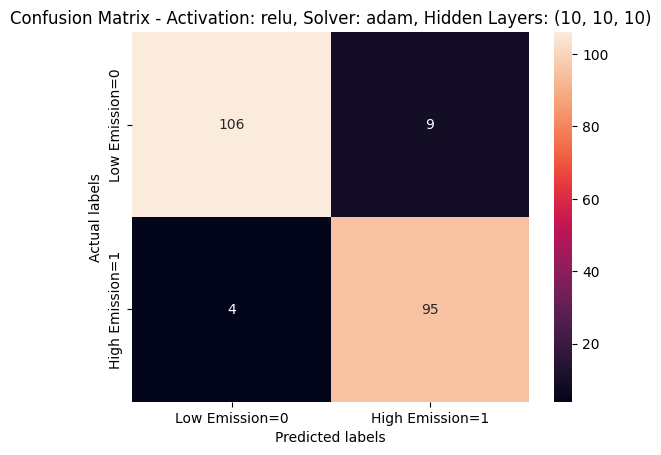

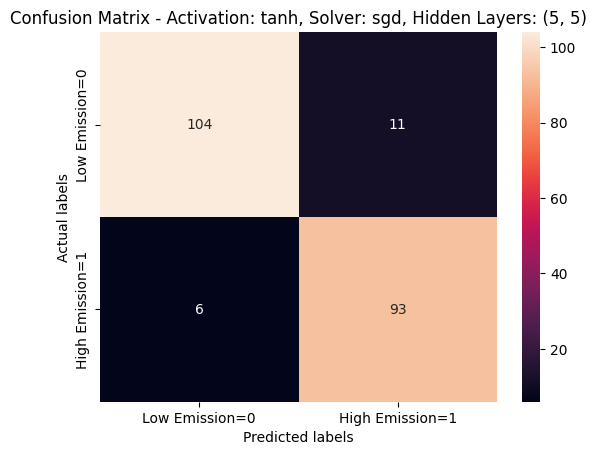

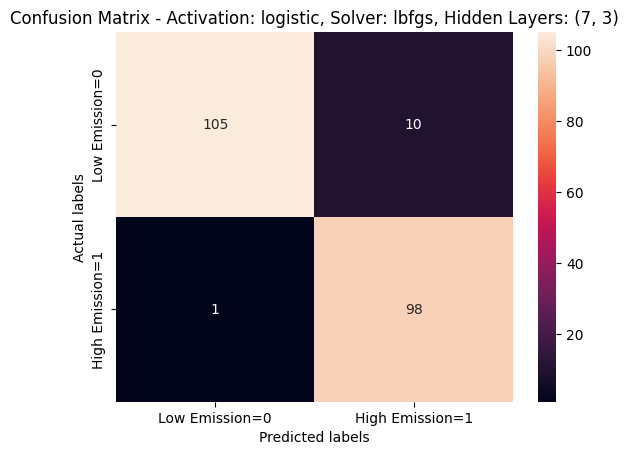

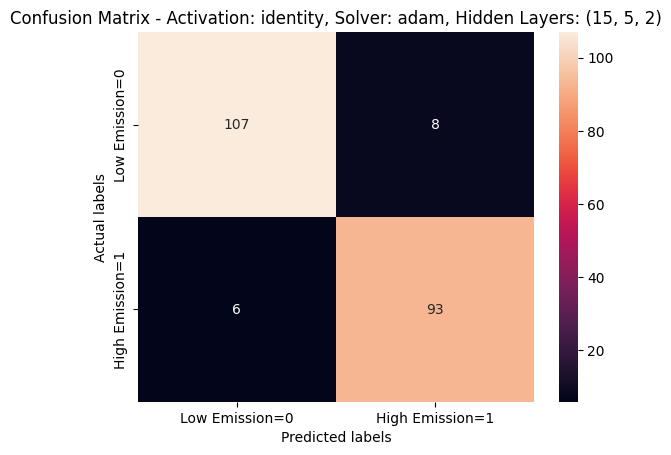

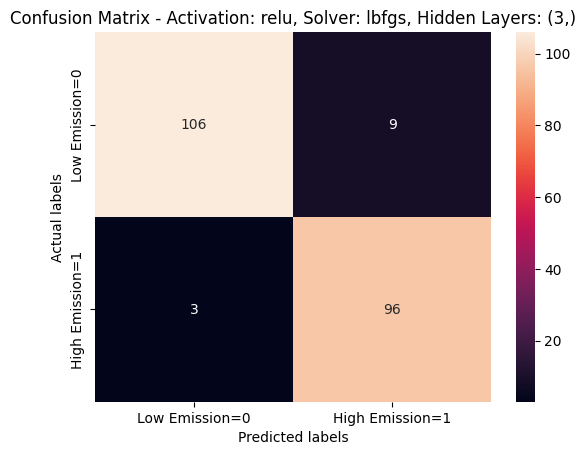

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Show the confusion matrix
for (activation, solver, hidden_layer, conf_matrix) in conf_matrices:
    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot=True, ax=ax, fmt='d')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels')
    ax.set_title(f'Confusion Matrix - Activation: {activation}, Solver: {solver}, Hidden Layers: {hidden_layer}')
    ax.xaxis.set_ticklabels(['Low Emission=0', 'High Emission=1'])
    ax.yaxis.set_ticklabels(['Low Emission=0', 'High Emission=1'])
    plt.show()

### 5. Indicate the hyperparameters that currently allow obtaining the network with the highest accuracy

In [121]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

print(f"Best Model - Activation: {best_model['Activation']}, Solver: {best_model['Solver']}, Hidden Layers: {best_model['Hidden Layers']}, Accuracy: {best_model['Accuracy']}")

Best Model - Activation: logistic, Solver: lbfgs, Hidden Layers: (7, 3), Accuracy: 0.9485981308411215


### 6. Select one of the hyperparameters available in the documentation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)) that is different from the solver, the activation function, and the random_state. Make variations in the selected hyperparameter while keeping the other hyperparameters from the previous point. Then analyze the accuracy.

In [122]:
#Varying the alpha hyperparameter
alpha_values = [0.001, 0.01, 0.1]
alpha_results = []

In [123]:
for alpha in alpha_values:
    model = MLPClassifier(activation=best_model['Activation'], solver=best_model['Solver'], hidden_layer_sizes=best_model['Hidden Layers'], alpha=alpha, random_state=123)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    alpha_results.append((alpha, accuracy))
    print(f"Alpha: {alpha}, Accuracy: {accuracy}")

Alpha: 0.001, Accuracy: 0.9532710280373832
Alpha: 0.01, Accuracy: 0.9485981308411215
Alpha: 0.1, Accuracy: 0.9672897196261683


In [124]:
# Show alpha results in a table
print(f"Default best Mode: Accuracy: {best_model['Accuracy'] } with Alpha: 0.0001\n")

alpha_results_df = pd.DataFrame(alpha_results, columns=['Alpha', 'Accuracy'])
print(alpha_results_df)

Default best Mode: Accuracy: 0.9485981308411215 with Alpha: 0.0001

   Alpha  Accuracy
0  0.001  0.953271
1  0.010  0.948598
2  0.100  0.967290


### Analysis

It should be noted that the default accuracy is 0.001, so I vary between 0.001, 0.01, and 0.1 to see the result. In this case, the following was obtained:

- For alpha 0.001, an improvement in the network was obtained
- For alpha 0.01, the network maintains its performance
- For alpha 0.1, improved even more than the previous ones and the default, achieving an accuracy of 0.967290